In [1]:
import sys
print(sys.version)

3.6.5 |Anaconda, Inc.| (default, Mar 29 2018, 13:32:41) [MSC v.1900 64 bit (AMD64)]


In [2]:

from pandas_datareader import data
from matplotlib import pyplot as plt
import pandas as pd
import datetime
import numpy as np


print(np.__version__)
print(pd.__version__)

1.14.3
0.23.0


In [3]:
#intruments to download
companies_dict = {
    'Amazon':'AMZN',
    'Apple':'AAPL',
    'Walgreen':'WBA',
    'Northrop Grumman':'NOC',
    'Boeing': 'BA',
    'Lockhead Martin':'LMT',
    'MacDonalds': 'MCD',
    'Intel': 'INTC',
    'Navistar':'NAV',
    'IBM':'IBM',
    'Texas Instruments':'TXN',
    'Mastercard':'MA',
    'Microsoft':'MSFT',
    'General Electronics':'GE',
    'Symantec':'SYMC',
    'American Express':'AXP',
    'Pepsi':'PEP',
    'Coca Cola':'KO',
    'Johnson Johnson':'JNJ',
    'Toyota':'TM',
    'Honda':'HMC',
    'Mstubishi':'MSBHY',
    'Sony':'SNE',
    'Exxon':'XOM',
    'Chevron':'CVX',
    'Valero Energy':'VLO',
    'Ford':'F',           
    'Bank of America':'BAC',
    'Nokia':'NOK'
    
   
}
companies = sorted(companies_dict.items(),key=lambda x: x[1])
print(companies)

[('Apple', 'AAPL'), ('Amazon', 'AMZN'), ('American Express', 'AXP'), ('Boeing', 'BA'), ('Bank of America', 'BAC'), ('Chevron', 'CVX'), ('Ford', 'F'), ('General Electronics', 'GE'), ('Honda', 'HMC'), ('IBM', 'IBM'), ('Intel', 'INTC'), ('Johnson Johnson', 'JNJ'), ('Coca Cola', 'KO'), ('Lockhead Martin', 'LMT'), ('Mastercard', 'MA'), ('MacDonalds', 'MCD'), ('Mstubishi', 'MSBHY'), ('Microsoft', 'MSFT'), ('Navistar', 'NAV'), ('Northrop Grumman', 'NOC'), ('Nokia', 'NOK'), ('Pepsi', 'PEP'), ('Sony', 'SNE'), ('Symantec', 'SYMC'), ('Toyota', 'TM'), ('Texas Instruments', 'TXN'), ('Valero Energy', 'VLO'), ('Walgreen', 'WBA'), ('Exxon', 'XOM')]


In [4]:
#online source to use
data_source = 'yahoo'
#start and the end date
start_date = '2016-06-02'
end_date = '2018-06-02'

#pandas reader to load stack data
panel_data = data.DataReader(list(companies_dict.values()),data_source,start_date,end_date)
print(panel_data.axes)

[DatetimeIndex(['2016-06-01', '2016-06-02', '2016-06-03', '2016-06-06',
               '2016-06-07', '2016-06-08', '2016-06-09', '2016-06-10',
               '2016-06-13', '2016-06-14',
               ...
               '2018-05-18', '2018-05-21', '2018-05-22', '2018-05-23',
               '2018-05-24', '2018-05-25', '2018-05-29', '2018-05-30',
               '2018-05-31', '2018-06-01'],
              dtype='datetime64[ns]', name='Date', length=505, freq=None), MultiIndex(levels=[['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], ['AAPL', 'AMZN', 'AXP', 'BA', 'BAC', 'CVX', 'F', 'GE', 'HMC', 'IBM', 'INTC', 'JNJ', 'KO', 'LMT', 'MA', 'MCD', 'MSBHY', 'MSFT', 'NAV', 'NOC', 'NOK', 'PEP', 'SNE', 'SYMC', 'TM', 'TXN', 'VLO', 'WBA', 'XOM']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2

In [5]:
#stock open and close data values
stock_close = panel_data['Close']  #closing value of stock of all companies
stock_open  = panel_data['Open']   #opening value of stock of all companies

print(stock_close.iloc[0])

Symbols
AAPL      98.459999
AMZN     719.440002
AXP       65.910004
BA       126.410004
BAC       14.860000
CVX      101.129997
F         13.110000
GE        30.110001
HMC       27.700001
IBM      152.509995
INTC      31.660000
JNJ      112.779999
KO        44.700001
LMT      238.080002
MA        96.410004
MCD      121.970001
MSBHY     35.360001
MSFT      52.849998
NAV       11.150000
NOC      214.169998
NOK        5.670000
PEP      101.570000
SNE       27.860001
SYMC      17.309999
TM       103.330002
TXN       61.070000
VLO       55.750000
WBA       78.099998
XOM       89.239998
Name: 2016-06-01 00:00:00, dtype: float64


In [6]:
#calculate daily stock movement
stock_close = np.array(stock_close).T   #T is here for transpose as our data is in column vector
stock_open = np.array(stock_open).T

row,column = stock_close.shape  #give no.s of rows and columns

print(row)
print(column)

movements = np.zeros([row,column])
for i in range(0,row):
    movements[i,:] = np.subtract(stock_close[i,:],stock_open[i,:])   #each companies and all of the dates

29
505


In [7]:
for i in range(0,len(companies)):
    print("comapny:{},change:{}".format(companies[i][0],sum(movements[i][:])))
    

comapny:Apple,change:57.33997344970703
comapny:Amazon,change:-145.390380859375
comapny:American Express,change:-1.5598487854003906
comapny:Boeing,change:91.9000015258789
comapny:Bank of America,change:-1.0900249481201172
comapny:Chevron,change:7.520149230957031
comapny:Ford,change:-2.8799962997436523
comapny:General Electronics,change:-13.569962501525879
comapny:Honda,change:-3.5099964141845703
comapny:IBM,change:-26.029953002929688
comapny:Intel,change:13.140052795410156
comapny:Johnson Johnson,change:-4.620048522949219
comapny:Coca Cola,change:-0.24002456665039062
comapny:Lockhead Martin,change:-46.14002990722656
comapny:Mastercard,change:31.840011596679688
comapny:MacDonalds,change:2.6000137329101562
comapny:Mstubishi,change:14.300041198730469
comapny:Microsoft,change:9.710002899169922
comapny:Navistar,change:-1.1999788284301758
comapny:Northrop Grumman,change:-2.2203521728515625
comapny:Nokia,change:0.4399995803833008
comapny:Pepsi,change:1.2099990844726562
comapny:Sony,change:4.19

In [8]:
movements.shape

(29, 505)

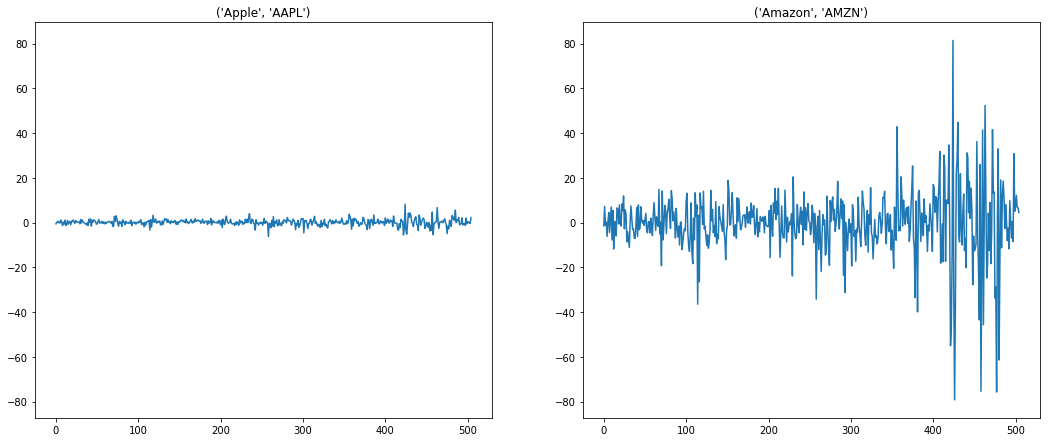

In [9]:
#Visulatization-Stock movements
plt.clf                    #give us a blank start 
plt.figure(figsize = (18,16))    #adjusting size of image
ax1 = plt.subplot(221)
plt.plot(movements[0][:])
plt.title(companies[0])

plt.subplot(222,sharey = ax1)
plt.plot(movements[1][:])
plt.title(companies[1])
plt.show()

In [10]:
#Import Normalizer
from sklearn.preprocessing import Normalizer

#Create the normalizer
normalizer = Normalizer()
new  = normalizer.fit_transform(movements)

print(new.max())
print(new.min())
print(new.mean())
print(movements.max())
print(movements.min())
print(movements.mean())

0.3385067316484979
-0.3516483201184336
0.0004711334175620828
81.3800048828125
-79.1800537109375
0.003954900348906876


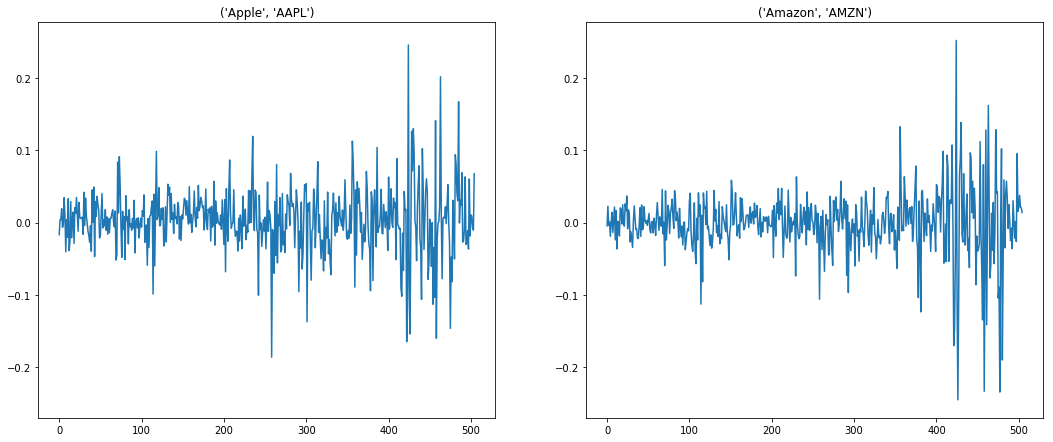

In [11]:
# Visualization - Plot Stock Movements
plt.clf
plt.figure(figsize=(18, 16))
ax1 = plt.subplot(221)
plt.plot(new[0][:])
plt.title(companies[0])

plt.subplot(222, sharey=ax1)
plt.plot(new[1][:])
plt.title(companies[1])
plt.show()

In [12]:
#import library
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()

#creating a Kmeans model -  10 cluster
kmeans = KMeans(n_clusters=10,max_iter = 1000)

#make a pipeline chaining normalizer and kmean
pipeline = make_pipeline(normalizer, kmeans)

In [13]:
#fit pipeline to daily stock movement
pipeline.fit(movements)

Pipeline(memory=None,
     steps=[('normalizer', Normalizer(copy=True, norm='l2')), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

In [14]:
print(kmeans.inertia_)

8.816467049129539


In [15]:
#Import pandas
import pandas as pd

#predict the labels
labels = pipeline.predict(movements)

#create a dataframe aligning labels and companies
df = pd.DataFrame({'labels':labels,'companies':companies})

#display data frame sorted by cluster labels
print(df.sort_values('labels'))

    labels                  companies
16       0         (Mstubishi, MSBHY)
20       1               (Nokia, NOK)
9        1                 (IBM, IBM)
15       1          (MacDonalds, MCD)
6        1                  (Ford, F)
8        1               (Honda, HMC)
4        1     (Bank of America, BAC)
24       1               (Toyota, TM)
2        1    (American Express, AXP)
21       2               (Pepsi, PEP)
11       2     (Johnson Johnson, JNJ)
12       2            (Coca Cola, KO)
7        3  (General Electronics, GE)
25       4   (Texas Instruments, TXN)
17       4          (Microsoft, MSFT)
22       4                (Sony, SNE)
0        4              (Apple, AAPL)
14       4           (Mastercard, MA)
10       4              (Intel, INTC)
1        4             (Amazon, AMZN)
5        5             (Chevron, CVX)
26       5       (Valero Energy, VLO)
28       5               (Exxon, XOM)
19       6    (Northrop Grumman, NOC)
13       6     (Lockhead Martin, LMT)
3        6  

In [48]:
from sklearn.decomposition import PCA

# Visualize the results on PCA-reduced data
reduced_data = PCA(n_components = 2).fit_transform(new) # components 2 because we want to show it on 2 dimensional graph

# run kmeans on the reduced data
kmeans = KMeans(n_clusters=10)
kmeans.fit(reduced_data)
labels = kmeans.predict(reduced_data)

print(kmeans.inertia_)

# Create a DataFrame aligning labels and companies
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster labels
print(df.sort_values('labels'))

0.13862444712117736
    labels                  companies
0        0              (Apple, AAPL)
25       0   (Texas Instruments, TXN)
22       0                (Sony, SNE)
3        0               (Boeing, BA)
10       0              (Intel, INTC)
7        1  (General Electronics, GE)
28       1               (Exxon, XOM)
5        1             (Chevron, CVX)
11       2     (Johnson Johnson, JNJ)
15       2          (MacDonalds, MCD)
6        3                  (Ford, F)
18       3            (Navistar, NAV)
26       4       (Valero Energy, VLO)
9        4                 (IBM, IBM)
23       4           (Symantec, SYMC)
20       4               (Nokia, NOK)
16       4         (Mstubishi, MSBHY)
13       5     (Lockhead Martin, LMT)
19       5    (Northrop Grumman, NOC)
1        6             (Amazon, AMZN)
17       6          (Microsoft, MSFT)
14       6           (Mastercard, MA)
21       7               (Pepsi, PEP)
12       7            (Coca Cola, KO)
2        8    (American Expres

<Figure size 432x288 with 0 Axes>

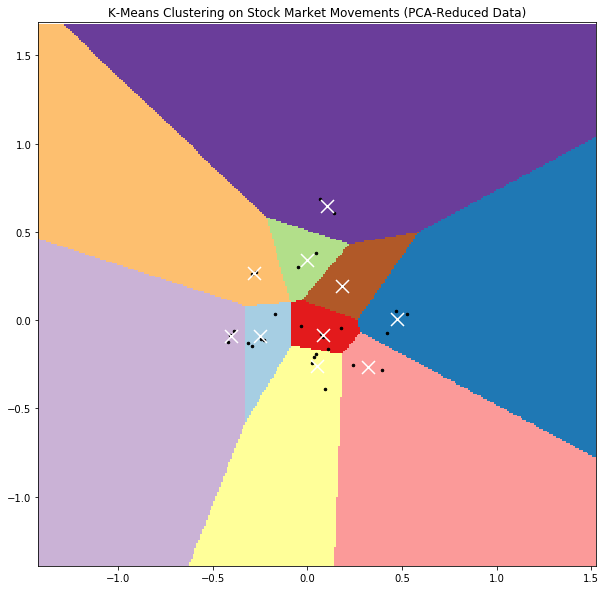

In [49]:
# Define step size of mesh.
h = 0.01

# Plot the decision boundary
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:,0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in the mesh using our trained model
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

# Define colorplot
cmap = plt.cm.Paired

# Plotting figure
plt.clf()
plt.figure(figsize=(10, 10))
plt.imshow(Z, interpolation='nearest',
          extent=(xx.min(), xx.max(), yy.min(), yy.max()),
          cmap = cmap,
          aspect = 'auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=5)

# Plot the centroid of each cluster as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
           marker='x', s=169, linewidths=3,
           color='w', zorder=10)

plt.title('K-Means Clustering on Stock Market Movements (PCA-Reduced Data)')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()